### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### File paths

In [3]:
LOSS = '/home/vilimovs/'

### AlexNet vs GoogleNet

### AlexNet

In [4]:
alex_train = []
alex_val = []
for i in range(7):
    alex_train.append(np.load(LOSS + 'model_1/loss/train_loss_' + str(i) + '.npy'))
    alex_val.append(np.load(LOSS + 'model_1/loss/val_loss_' + str(i) + '.npy'))

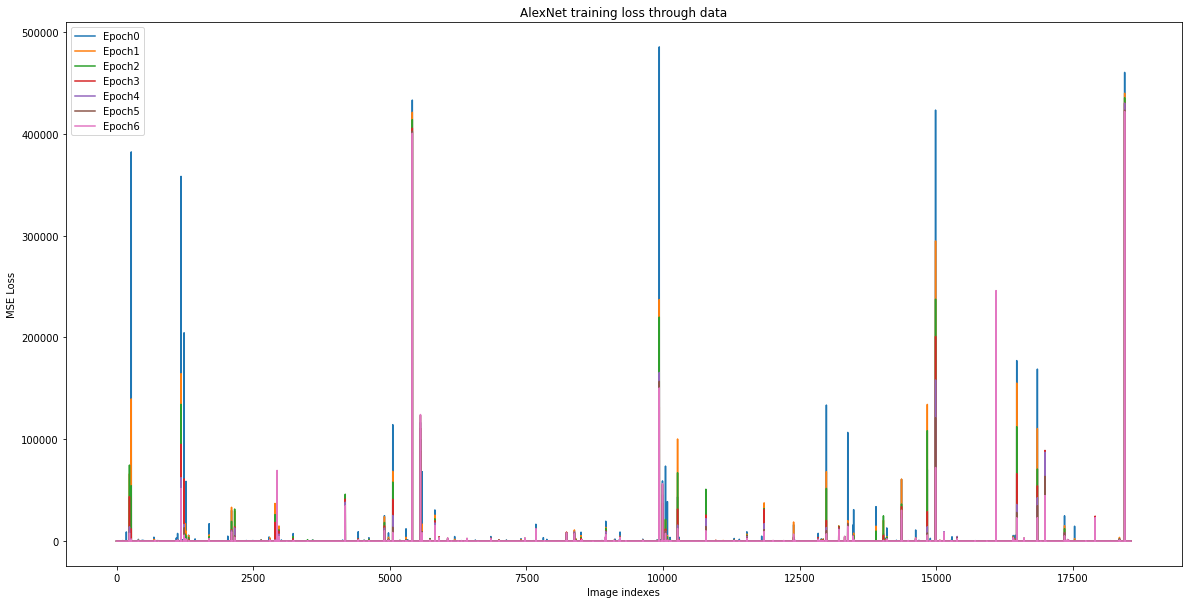

In [31]:
plt.figure(figsize=(20, 10))
for i in range(7):
    plt.plot(alex_train[i], label="Epoch"+str(i))
plt.title("AlexNet training loss through data")
plt.xlabel("Image indexes")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

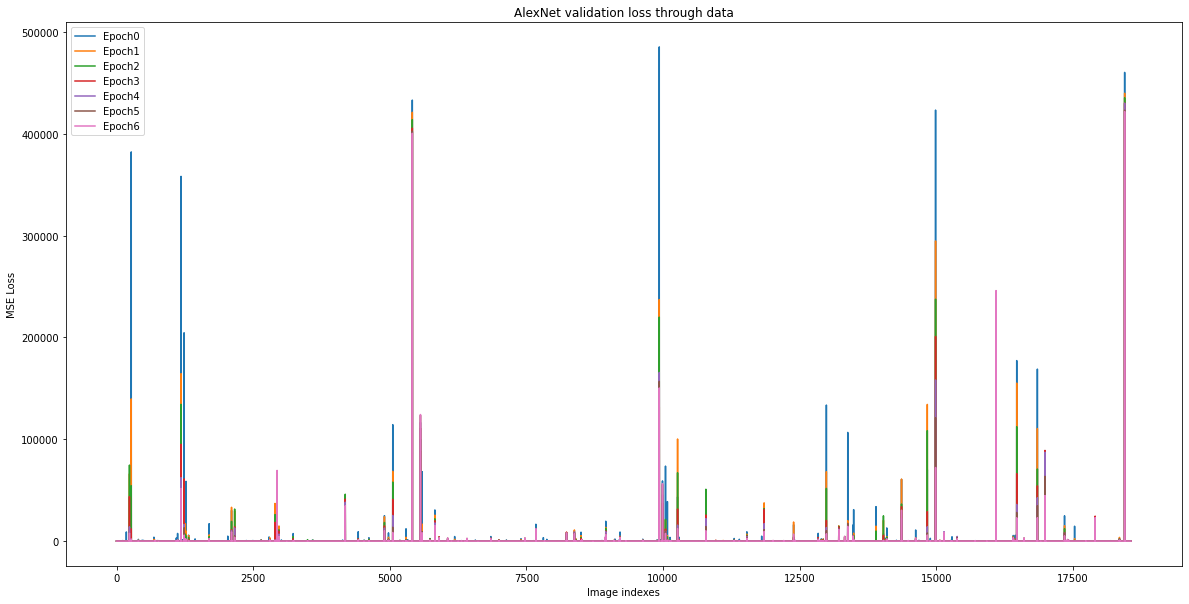

In [32]:
plt.figure(figsize=(20, 10))
for i in range(7):
    plt.plot(alex_train[i], label="Epoch"+str(i))
plt.title("AlexNet validation loss through data")
plt.xlabel("Image indexes")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

### GoogleNet

In [5]:
google_train_1 = []
google_train_2 = []
google_val_1 = []
google_val_2 = []
for i in range(4):
    google_train_1.append(np.load(LOSS + 'model_2/loss/train_loss_' + str(i) + '.npy'))
    google_train_2.append(np.load(LOSS + 'model_2_2/loss/train_loss_' + str(i) + '.npy'))
    google_val_1.append(np.load(LOSS + 'model_2/loss/val_loss_' + str(i) + '.npy'))
    google_val_2.append(np.load(LOSS + 'model_2_2/loss/val_loss_' + str(i) + '.npy'))

#### Training loss

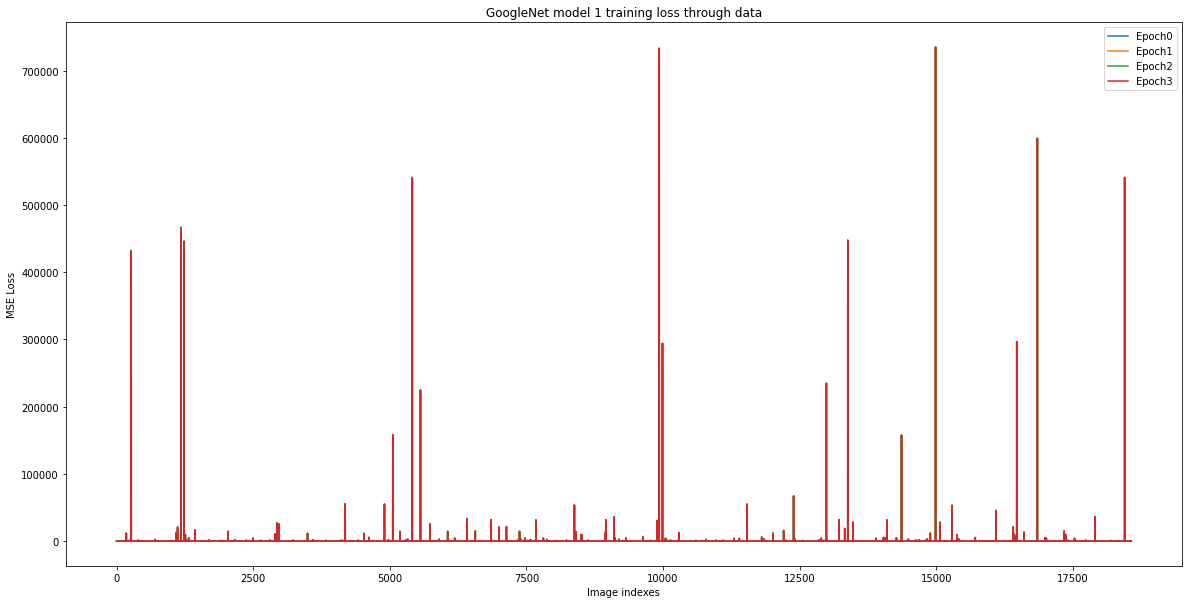

In [34]:
plt.figure(figsize=(20, 10))
for i in range(4):
    plt.plot(google_train_1[i], label="Epoch"+str(i))
plt.title("GoogleNet model 1 training loss through data")
plt.xlabel("Image indexes")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

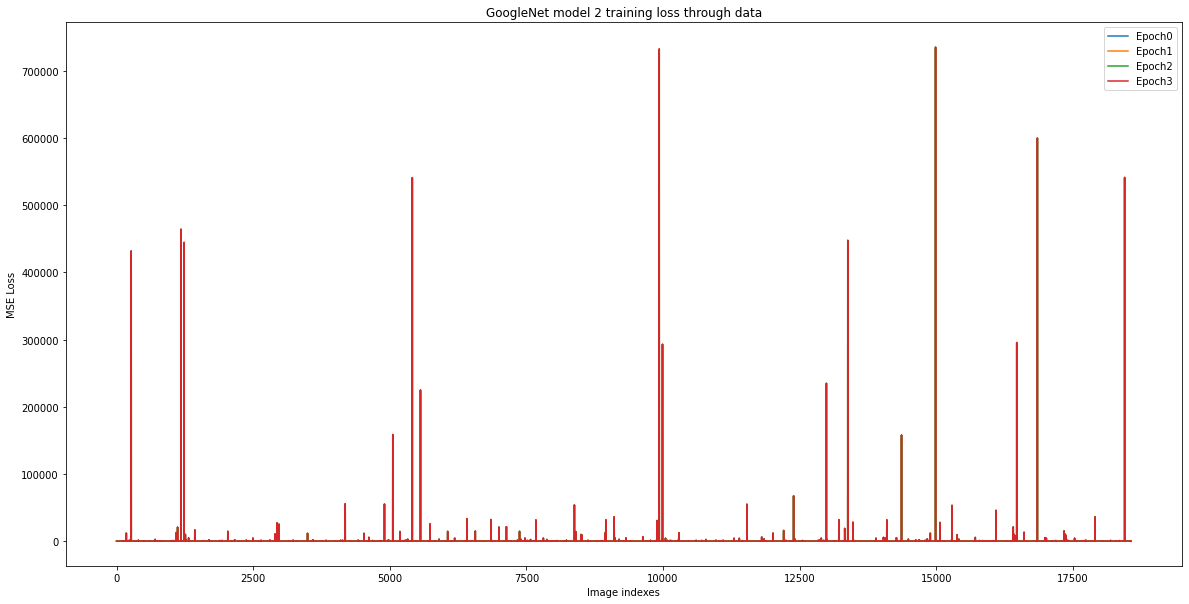

In [36]:
plt.figure(figsize=(20, 10))
for i in range(4):
    plt.plot(google_train_2[i], label="Epoch"+str(i))
plt.title("GoogleNet model 2 training loss through data")
plt.xlabel("Image indexes")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

#### Validation loss

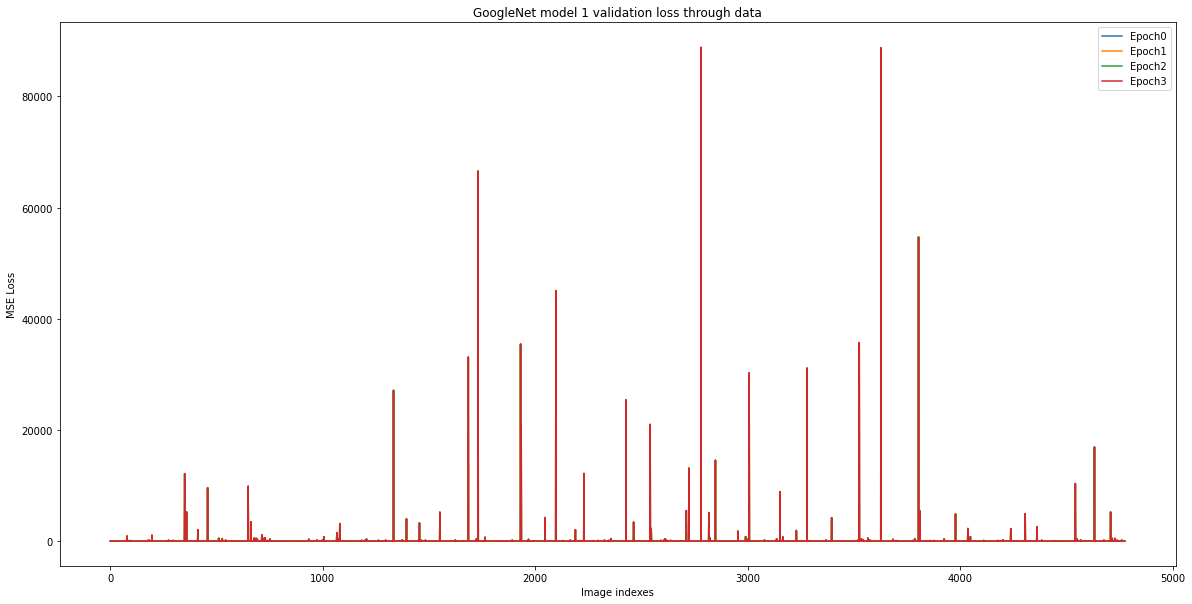

In [37]:
plt.figure(figsize=(20, 10))
for i in range(4):
    plt.plot(google_val_1[i], label="Epoch"+str(i))
plt.title("GoogleNet model 1 validation loss through data")
plt.xlabel("Image indexes")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

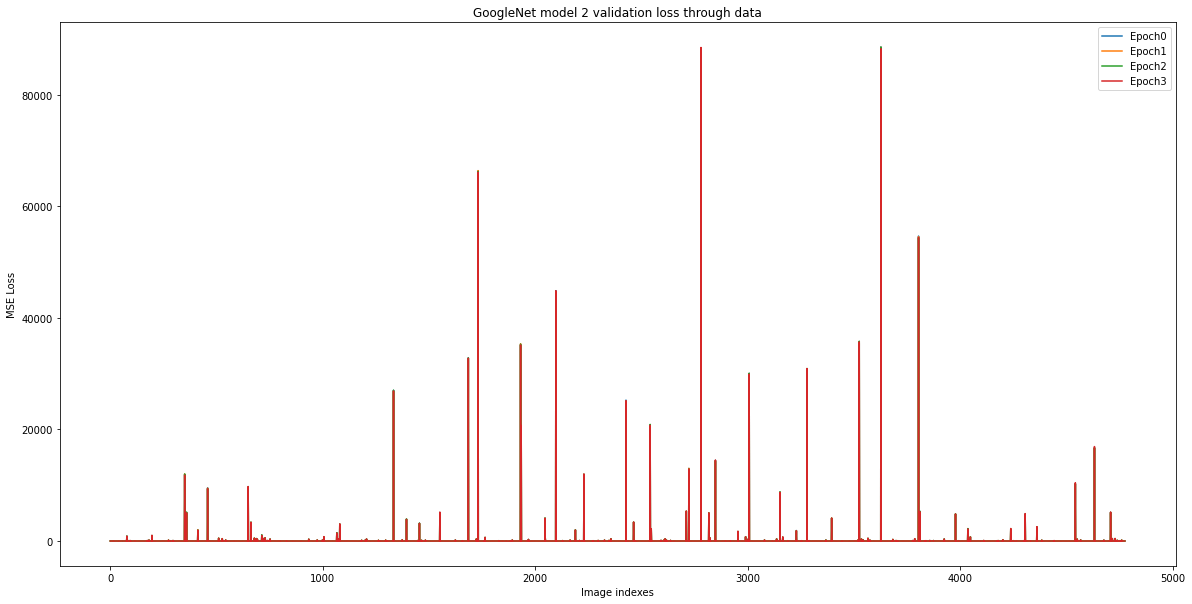

In [38]:
plt.figure(figsize=(20, 10))
for i in range(4):
    plt.plot(google_val_2[i], label="Epoch"+str(i))
plt.title("GoogleNet model 2 validation loss through data")
plt.xlabel("Image indexes")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

#### Means through training

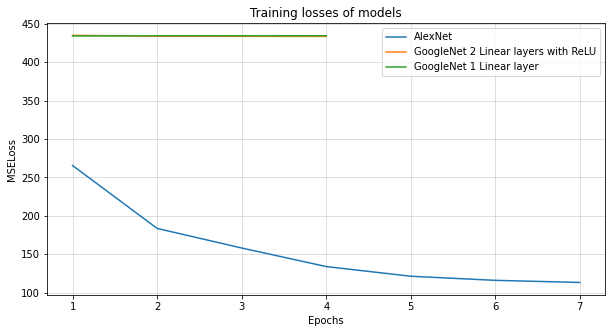

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), np.mean(alex_train, axis=1), label="AlexNet")
plt.plot(range(1, 5), np.mean(google_train_1, axis=1), label="GoogleNet 2 Linear layers with ReLU")
plt.plot(range(1, 5), np.mean(google_train_2, axis=1), label="GoogleNet 1 Linear layer")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Training losses of models")
plt.ylabel("MSELoss")
plt.xlabel("Epochs")
plt.savefig("./mean_train_loss_alex_google.pdf", format="pdf", bbox_inches="tight")
plt.show()

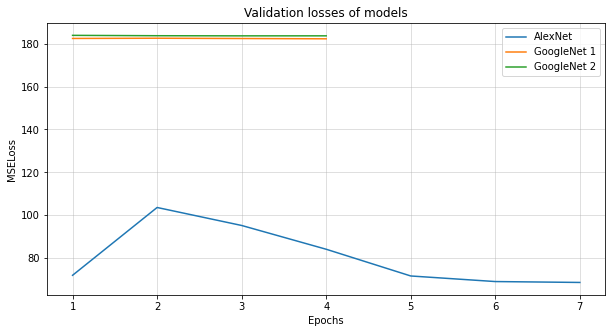

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 8), np.mean(alex_val, axis=1), label="AlexNet")
plt.plot(range(1, 5), np.mean(google_val_1, axis=1), label="GoogleNet 1")
plt.plot(range(1, 5), np.mean(google_val_2, axis=1), label="GoogleNet 2")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Validation losses of models")
plt.ylabel("MSELoss")
plt.xlabel("Epochs")
plt.savefig("./mean_val_loss_alex_google.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Multiple loss model

#### Load

In [13]:
mult_train = []
mult_val = []
special_train = []
special_val = []
for i in range(10):
    mult_train.append(np.load(LOSS + 'model_3/loss/train_loss_' + str(i) + '.npy'))
    mult_val.append(np.load(LOSS + 'model_3/loss/val_loss_' + str(i) + '.npy'))
    special_train.append(np.load(LOSS + 'model_4/loss/train_loss_' + str(i) + '.npy'))
    special_val.append(np.load(LOSS + 'model_4/loss/val_loss_' + str(i) + '.npy'))
mult_train = np.array(mult_train)
mult_val = np.array(mult_val)
special_train = np.array(special_train)
special_val = np.array(special_val)

#### Mean calculation

In [14]:
stats_train = [[], [], [], []]
stats_val = [[], [], [], []]
for i in range(10):
    for j in range(4):
        stats_train[j].append(np.mean(mult_train[i][:, j]))
        stats_val[j].append(np.mean(mult_val[i][:, j]))

#### Mean through epochs

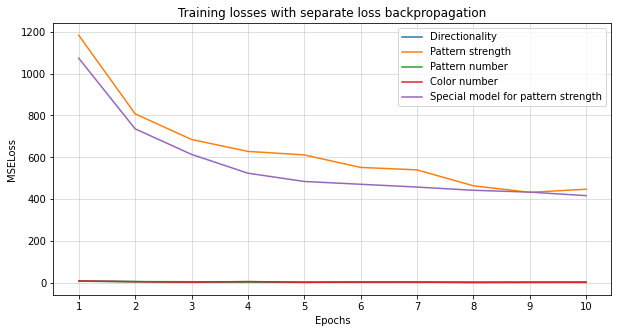

In [15]:
stats_label = ["Directionality", "Pattern strength", "Pattern number", "Color number"]
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(range(1, 11), stats_train[i], label=stats_label[i])
    
plt.plot(range(1, 11), np.mean(special_train, axis=1), label="Special model for pattern strength")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Training losses with separate loss backpropagation")
plt.ylabel("MSELoss")
plt.xlabel("Epochs")
plt.xticks(range(1, 11))
plt.show()

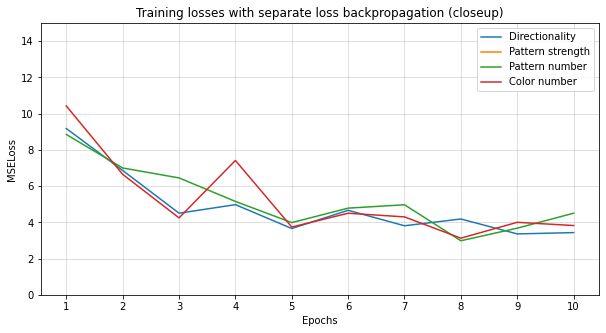

In [16]:
stats_label = ["Directionality", "Pattern strength", "Pattern number", "Color number"]
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(range(1, 11), stats_train[i], label=stats_label[i])

plt.legend()
plt.grid(alpha=0.5)
plt.title("Training losses with separate loss backpropagation (closeup)")
plt.ylabel("MSELoss")
plt.xlabel("Epochs")
plt.xticks(range(1, 11))
plt.ylim(0, 15)
plt.show()

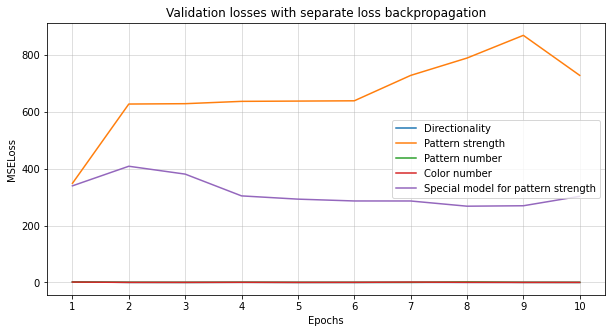

In [19]:
stats_label = ["Directionality", "Pattern strength", "Pattern number", "Color number"]
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(range(1, 11), stats_val[i], label=stats_label[i])
    
plt.plot(range(1, 11), np.mean(special_val, axis=1), label="Special model for pattern strength")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Validation losses with separate loss backpropagation")
plt.ylabel("MSELoss")
plt.xlabel("Epochs")
plt.xticks(range(1, 11))
plt.savefig("./mean_val_loss_multiple.pdf", format="pdf", bbox_inches="tight")
plt.show()

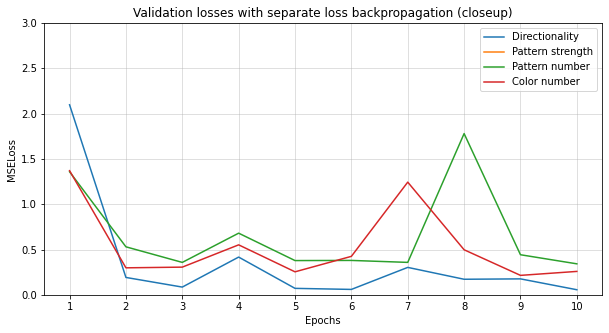

In [21]:
stats_label = ["Directionality", "Pattern strength", "Pattern number", "Color number"]
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(range(1, 11), stats_val[i], label=stats_label[i])
plt.legend()
plt.grid(alpha=0.5)
plt.title("Validation losses with separate loss backpropagation (closeup)")
plt.ylabel("MSELoss")
plt.xlabel("Epochs")
plt.ylim(0, 3)
plt.xticks(range(1, 11))
plt.savefig("./mean_val_loss_multiple_close.pdf", format="pdf", bbox_inches="tight")
plt.show()